In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# File paths
filename_base = "pythia_run_output" 
filename_base = "pythia_OO_5p36TeV_argantyr/seed_107474/pythia_OO_5p36TeV_argantyr_seed_107474"
# filename_base = "arg_at_5GeV"
events_file = f"{filename_base}_events.parquet"
particles_file = f"{filename_base}_particles.parquet"

print("Setting up visualization environment...")
print(f"Events file: {events_file}")
print(f"Particles file: {particles_file}")

# Load the data
try:
    events_df = pd.read_parquet(events_file)
    particles_df = pd.read_parquet(particles_file)
    
    print("Data loaded successfully!")
    print(f"Events: {len(events_df)} events")
    print(f"Particles: {len(particles_df)} particles")
    print(f"Average particles per event: {len(particles_df)/len(events_df):.1f}")
    
    # Display basic info about the data
    print("\nEvent-level columns:", list(events_df.columns))
    print("Particle-level columns:", list(particles_df.columns))
    
except FileNotFoundError as e:
    print(f"Error: Could not find data files. Make sure you have run the pythia_parquet.py script first.")
    print(f"Looking for: {events_file} and {particles_file}")
    print("You may need to adjust the file paths above.")

Setting up visualization environment...
Events file: pythia_OO_5p36TeV_argantyr/seed_107474/pythia_OO_5p36TeV_argantyr_seed_107474_events.parquet
Particles file: pythia_OO_5p36TeV_argantyr/seed_107474/pythia_OO_5p36TeV_argantyr_seed_107474_particles.parquet
Data loaded successfully!
Events: 10000 events
Particles: 2213956 particles
Average particles per event: 221.4

Event-level columns: ['event_id', 'impact_parameter', 'n_part_proj', 'n_part_targ', 'n_part', 'n_coll', 'hi_weight', 'hi_weightSum', 'hi_glauber_tot', 'hi_glauber_tot_err', 'hi_glauber_nd', 'hi_glauber_nd_err', 'hi_glauber_inel', 'hi_glauber_inel_err', 'hi_glauber_el', 'hi_glauber_el_err', 'sigma_gen', 'sigma_gen_err', 'weight', 'weightSum', 'n_particles', 'mean_pT', 'mean_eta', 'mean_phi', 'event_plane_angle', 'qx', 'qy']
Particle-level columns: ['event_id', 'particle_id', 'pT', 'eta', 'phi', 'charge']


In [7]:
# Display sample data and statistics
print("Sample event-level data:")
display(events_df.head())
print("\nEvent-level data statistics:")
display(events_df.describe())

print("\n" + "="*50)
print("Sample particle-level data:")
display(particles_df.head())
print("\nParticle-level data statistics:")
display(particles_df.describe())

Sample event-level data:


,event_id,impact_parameter,n_part_proj,n_part_targ,n_part,n_coll,hi_weight,hi_weightSum,hi_glauber_tot,hi_glauber_tot_err,...,sigma_gen_err,weight,weightSum,n_particles,mean_pT,mean_eta,mean_phi,event_plane_angle,qx,qy
0,0,2.603763,12,11,23,41,1.078766,5.302180,3030.448340,2142.850571,...,2142.850571,1.078766,303.044834,301,0.403580,0.487036,0.141139,0.532174,7.773296,14.013355
1,1,6.345322,2,1,3,2,1.568743,6.870924,4102.577708,1675.443642,...,1543.918840,1.568743,743.733017,60,0.525607,0.103912,-0.080645,0.544696,5.692864,10.897594
2,2,3.816519,5,10,15,14,1.176912,8.047835,4729.797370,1368.960752,...,1047.946371,1.176912,1074.348698,133,0.442626,0.225466,-0.217636,0.829620,-1.410600,15.907480
3,3,6.206934,2,2,4,3,1.538563,9.586398,4566.897129,1104.818291,...,853.049177,1.538563,1506.558536,81,0.612022,-0.102006,-0.145030,-0.693965,2.180704,-11.791932
4,4,5.765318,5,2,7,7,1.450228,11.036626,5093.473531,1038.616436,...,706.222377,1.450228,1913.953614,125,0.307895,0.027972,-0.132444,0.618180,1.418457,4.082019



Event-level data statistics:


,event_id,impact_parameter,n_part_proj,n_part_targ,n_part,n_coll,hi_weight,hi_weightSum,hi_glauber_tot,hi_glauber_tot_err,...,sigma_gen_err,weight,weightSum,n_particles,mean_pT,mean_eta,mean_phi,event_plane_angle,qx,qy
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4.333195,6.490600,6.463400,12.954000,18.318900,1.298995,57062.042432,2595.994687,40.469647,...,2.581015,1.298995,1.824365e+06,221.395600,0.358080,-0.000887,-0.004313,0.015403,-0.269083,0.209405
std,2886.89568,1.779942,4.643605,4.625581,8.989726,18.226366,0.247770,33552.090343,107.555763,53.757592,...,33.284287,0.247770,1.051659e+06,188.370154,0.084139,0.212000,0.227777,0.904552,10.000943,9.834844
min,0.00000,0.018942,1.000000,1.000000,2.000000,1.000000,1.000004,5.302180,2543.783054,19.806642,...,0.234370,1.000004,3.030448e+02,0.000000,0.000000,-1.838577,-2.609733,-1.570728,-81.847187,-78.806712
25%,2499.75000,3.027670,2.000000,2.000000,5.000000,3.000000,1.107954,28078.189519,2560.674318,23.003884,...,0.313631,1.107954,9.171640e+05,61.000000,0.326326,-0.099322,-0.105910,-0.759492,-4.114998,-3.670135
50%,4999.50000,4.426119,6.000000,6.000000,11.000000,11.000000,1.244940,57268.405858,2570.639400,28.043187,...,0.469177,1.244940,1.822093e+06,166.000000,0.361220,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7499.25000,5.658586,10.000000,10.000000,20.000000,29.000000,1.430587,85926.118053,2592.148314,40.007214,...,0.950245,1.430587,2.734512e+06,345.000000,0.396214,0.101014,0.098697,0.789842,3.772613,4.039951
max,9999.00000,10.730975,16.000000,16.000000,32.000000,97.000000,3.624807,115815.307657,5093.473531,2142.850571,...,2142.850571,3.624807,3.649111e+06,987.000000,1.013629,1.991737,2.240465,1.570067,81.235833,89.191451



Sample particle-level data:


,event_id,particle_id,pT,eta,phi,charge
0,0,-211,0.707492,-0.723001,-0.848874,-1.0
1,0,211,0.181459,-0.890415,2.293679,1.0
2,0,-211,0.171416,0.681016,-0.554531,-1.0
3,0,211,0.917386,-1.671121,-1.844015,1.0
4,0,211,0.707781,1.650373,1.694054,1.0



Particle-level data statistics:


,event_id,particle_id,pT,eta,phi,charge
count,2.213956e+06,2.213956e+06,2.213956e+06,2.213956e+06,2.213956e+06,2.213956e+06
mean,4.965343e+03,1.390001e+01,3.755152e-01,6.676797e-04,-2.948776e-03,-5.072368e-04
std,2.865075e+03,4.596586e+02,4.158775e-01,1.164448e+00,1.813804e+00,6.747166e-01
min,0.000000e+00,-2.212000e+03,1.204259e-04,-1.999999e+00,-3.141590e+00,-1.000000e+00
25%,2.521000e+03,2.200000e+01,1.229878e-01,-1.017380e+00,-1.576619e+00,0.000000e+00
50%,4.927000e+03,2.200000e+01,2.621942e-01,5.716429e-04,-1.775065e-03,0.000000e+00
75%,7.453000e+03,1.300000e+02,4.864800e-01,1.019205e+00,1.566965e+00,0.000000e+00
max,9.999000e+03,2.212000e+03,2.903626e+01,2.000000e+00,3.141592e+00,1.000000e+00


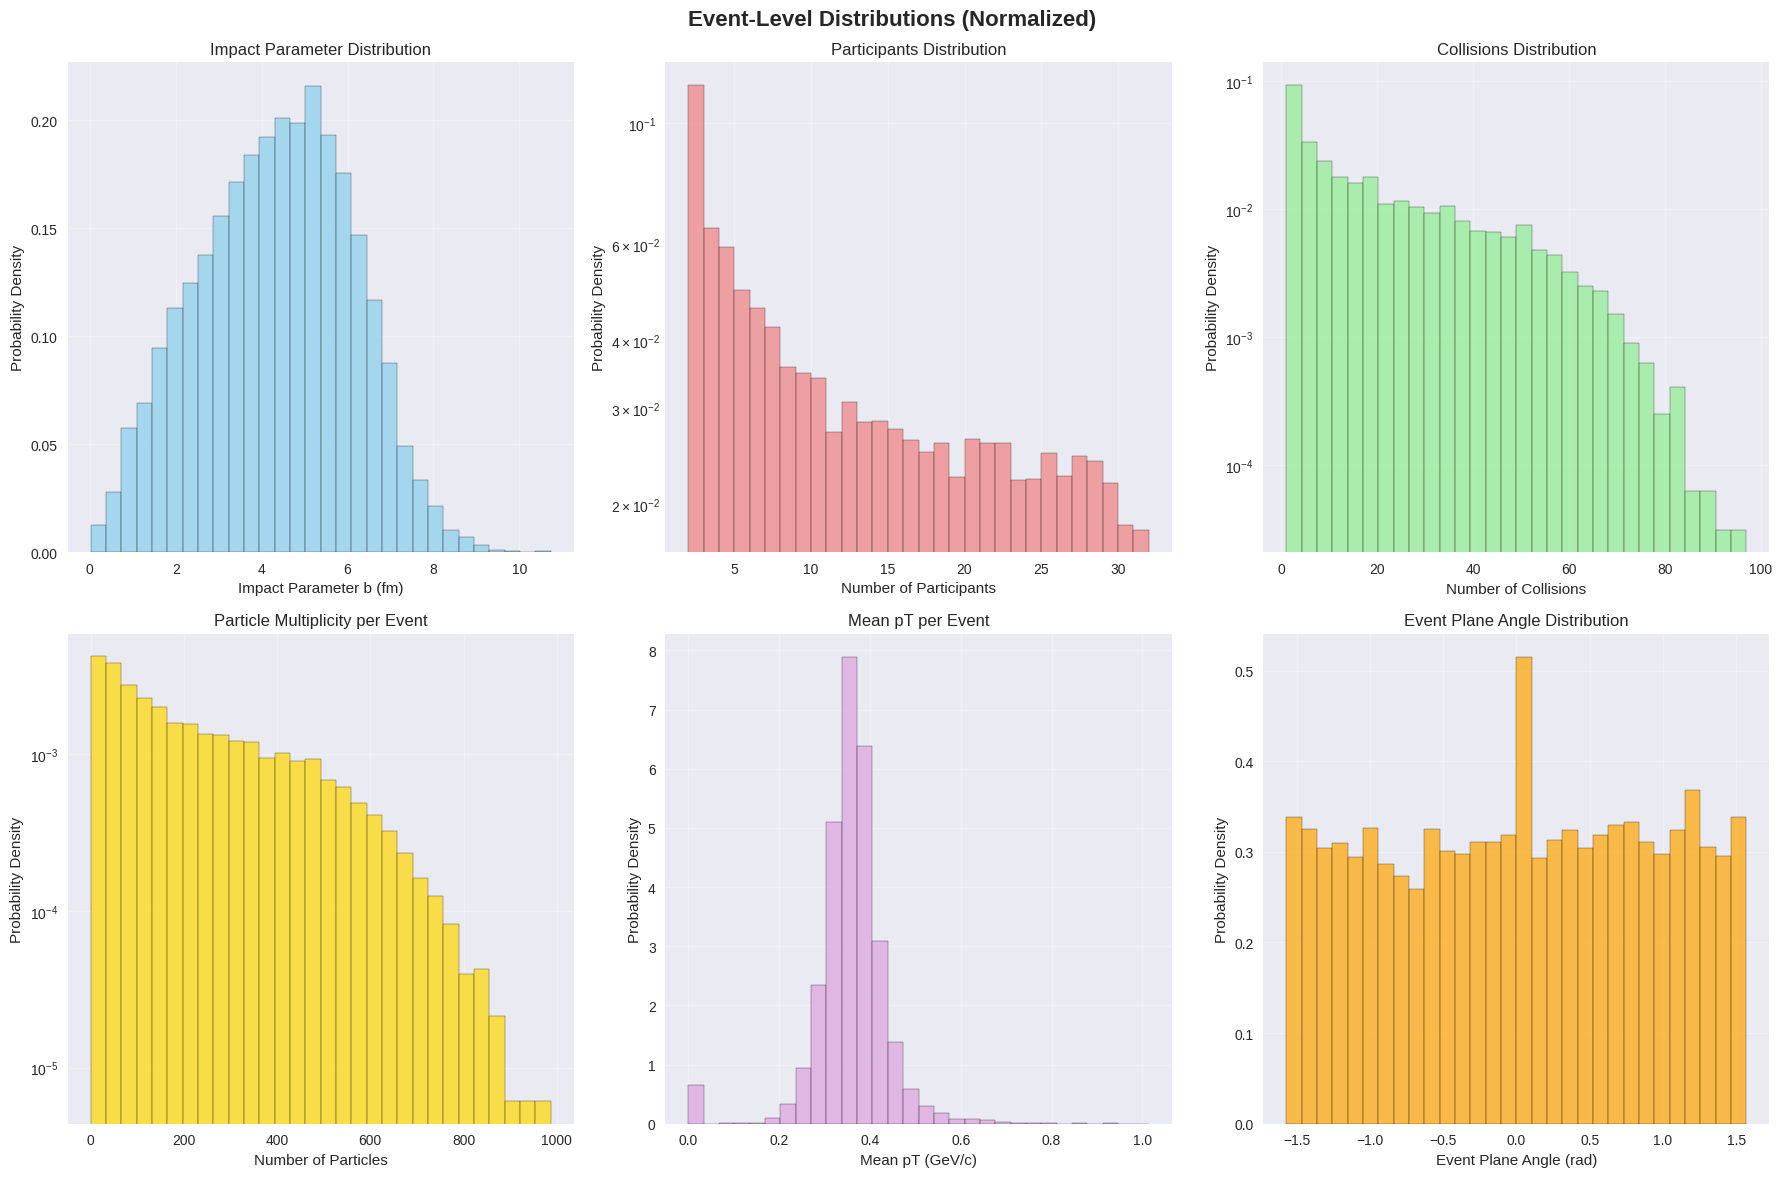

In [8]:
# Event-level histograms (normalized)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Event-Level Distributions (Normalized)', fontsize=16, fontweight='bold')

# Get total number of events for normalization
n_events = len(events_df)

# Impact parameter
axes[0,0].hist(events_df['impact_parameter'], bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
axes[0,0].set_xlabel('Impact Parameter b (fm)')
axes[0,0].set_ylabel('Probability Density')
axes[0,0].set_title('Impact Parameter Distribution')
axes[0,0].grid(True, alpha=0.3)

# Number of participants
axes[0,1].hist(events_df['n_part'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black', density=True)
axes[0,1].set_xlabel('Number of Participants')
axes[0,1].set_ylabel('Probability Density')
axes[0,1].set_title('Participants Distribution')
axes[0,1].set_yscale('log')  # Log scale for better visibility
axes[0,1].grid(True, alpha=0.3)

# Number of collisions
axes[0,2].hist(events_df['n_coll'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
axes[0,2].set_xlabel('Number of Collisions')
axes[0,2].set_ylabel('Probability Density')
axes[0,2].set_title('Collisions Distribution')
axes[0,2].set_yscale('log')  # Log scale for better visibility
axes[0,2].grid(True, alpha=0.3)

# Number of particles per event
axes[1,0].hist(events_df['n_particles'], bins=30, alpha=0.7, color='gold', edgecolor='black', density=True)
axes[1,0].set_xlabel('Number of Particles')
axes[1,0].set_ylabel('Probability Density')
axes[1,0].set_title('Particle Multiplicity per Event')
axes[1,0].set_yscale('log')  # Log scale for better visibility
axes[1,0].grid(True, alpha=0.3)

# Mean pT per event
axes[1,1].hist(events_df['mean_pT'], bins=30, alpha=0.7, color='plum', edgecolor='black', density=True)
axes[1,1].set_xlabel('Mean pT (GeV/c)')
axes[1,1].set_ylabel('Probability Density')
axes[1,1].set_title('Mean pT per Event')
axes[1,1].grid(True, alpha=0.3)

# Event plane angle
axes[1,2].hist(events_df['event_plane_angle'], bins=30, alpha=0.7, color='orange', edgecolor='black', density=True)
axes[1,2].set_xlabel('Event Plane Angle (rad)')
axes[1,2].set_ylabel('Probability Density')
axes[1,2].set_title('Event Plane Angle Distribution')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

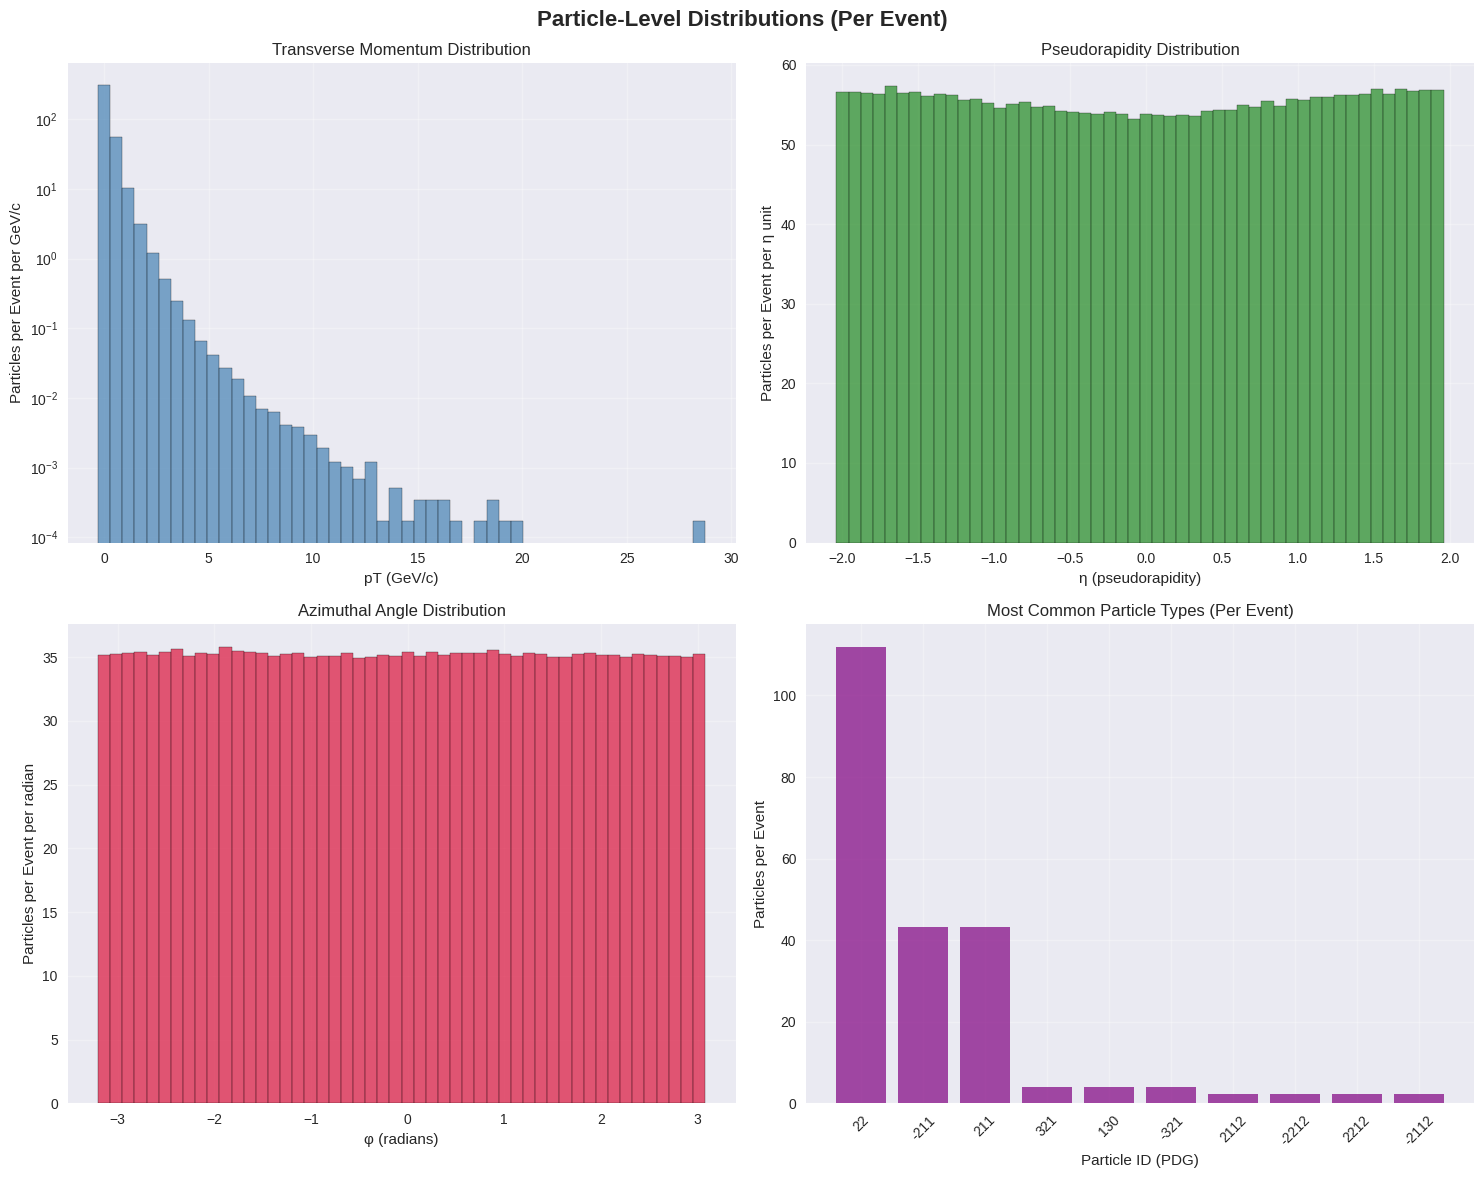

Most common particles (per event):
  PDG 22: 111.882 particles per event
  PDG -211: 43.344 particles per event
  PDG 211: 43.199 particles per event
  PDG 321: 4.143 particles per event
  PDG 130: 4.108 particles per event


In [9]:
# Particle-level histograms (normalized per event)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Particle-Level Distributions (Per Event)', fontsize=16, fontweight='bold')

# Get total number of events for normalization
n_events = len(events_df)

# pT distribution
counts, bins, patches = axes[0,0].hist(particles_df['pT'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
# Normalize by number of events
bin_width = bins[1] - bins[0]
normalized_counts = counts / n_events / bin_width
axes[0,0].clear()
axes[0,0].bar(bins[:-1], normalized_counts, width=bin_width, alpha=0.7, color='steelblue', edgecolor='black')
axes[0,0].set_xlabel('pT (GeV/c)')
axes[0,0].set_ylabel('Particles per Event per GeV/c')
axes[0,0].set_title('Transverse Momentum Distribution')
axes[0,0].set_yscale('log')  # Log scale for better visibility
axes[0,0].grid(True, alpha=0.3)

# eta distribution
counts, bins, patches = axes[0,1].hist(particles_df['eta'], bins=50, alpha=0.7, color='forestgreen', edgecolor='black')
# Normalize by number of events
bin_width = bins[1] - bins[0]
normalized_counts = counts / n_events / bin_width
axes[0,1].clear()
axes[0,1].bar(bins[:-1], normalized_counts, width=bin_width, alpha=0.7, color='forestgreen', edgecolor='black')
axes[0,1].set_xlabel('η (pseudorapidity)')
axes[0,1].set_ylabel('Particles per Event per η unit')
axes[0,1].set_title('Pseudorapidity Distribution')
axes[0,1].grid(True, alpha=0.3)

# phi distribution
counts, bins, patches = axes[1,0].hist(particles_df['phi'], bins=50, alpha=0.7, color='crimson', edgecolor='black')
# Normalize by number of events
bin_width = bins[1] - bins[0]
normalized_counts = counts / n_events / bin_width
axes[1,0].clear()
axes[1,0].bar(bins[:-1], normalized_counts, width=bin_width, alpha=0.7, color='crimson', edgecolor='black')
axes[1,0].set_xlabel('φ (radians)')
axes[1,0].set_ylabel('Particles per Event per radian')
axes[1,0].set_title('Azimuthal Angle Distribution')
axes[1,0].grid(True, alpha=0.3)

# Particle ID distribution (most common particles) - normalized per event
particle_counts = particles_df['particle_id'].value_counts().head(10)
normalized_counts = particle_counts / n_events
axes[1,1].bar(range(len(normalized_counts)), normalized_counts.values, alpha=0.7, color='purple')
axes[1,1].set_xlabel('Particle ID (PDG)')
axes[1,1].set_ylabel('Particles per Event')
axes[1,1].set_title('Most Common Particle Types (Per Event)')
axes[1,1].set_xticks(range(len(normalized_counts)))
axes[1,1].set_xticklabels(normalized_counts.index, rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the most common particles (per event)
print("Most common particles (per event):")
for pid, count in particle_counts.head().items():
    avg_per_event = count / n_events
    print(f"  PDG {pid}: {avg_per_event:.3f} particles per event")

<Figure size 1600x1400 with 0 Axes>

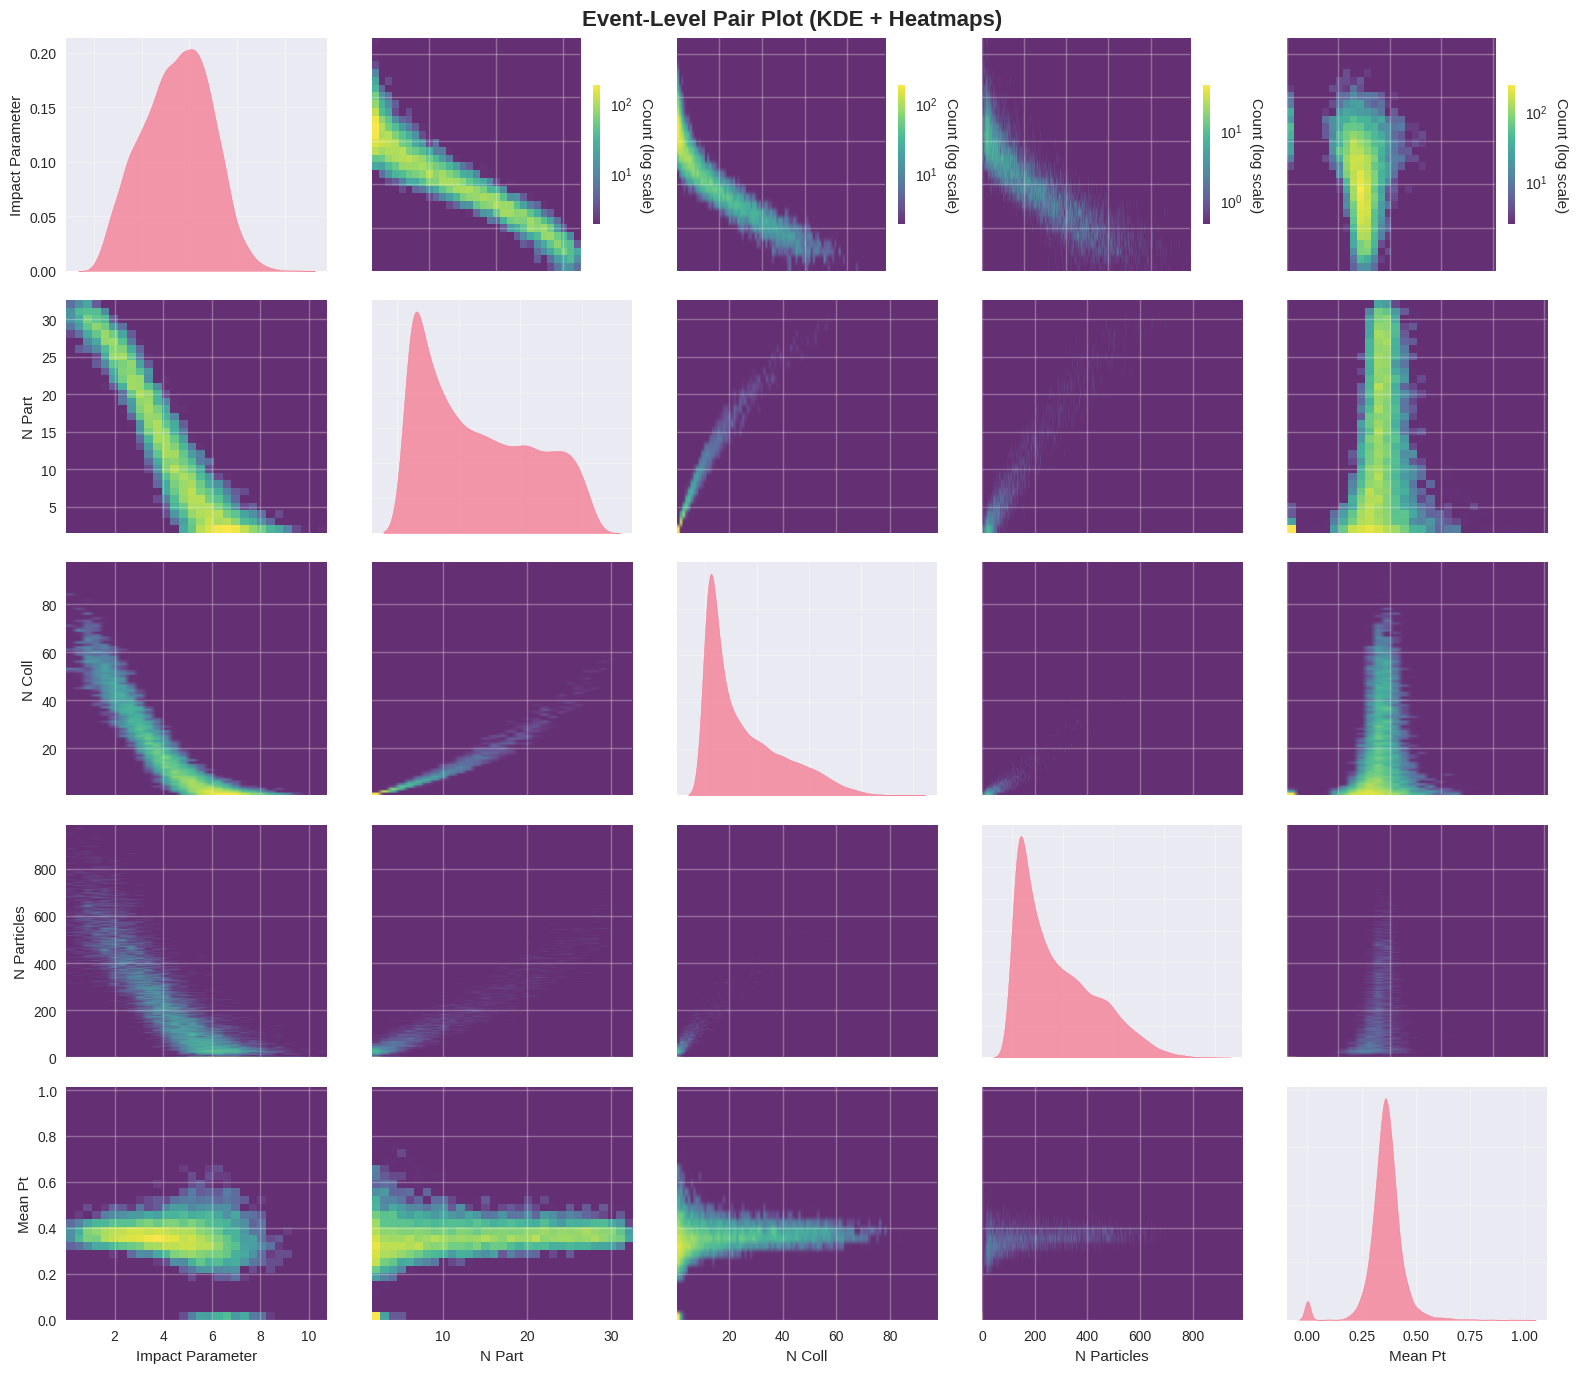

In [10]:
# Event-level pair plot with KDE and heatmaps
fig = plt.figure(figsize=(16, 14))

# Select relevant event-level columns for pair plot
event_cols = ['impact_parameter', 'n_part', 'n_coll', 'n_particles', 'mean_pT']
event_data = events_df[event_cols].copy()

# Create custom pair plot
n_vars = len(event_cols)
fig, axes = plt.subplots(n_vars, n_vars, figsize=(16, 14))
fig.suptitle('Event-Level Pair Plot (KDE + Heatmaps)', fontsize=16, fontweight='bold')

for i in range(n_vars):
    for j in range(n_vars):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: KDE plot
            sns.kdeplot(data=event_data, x=event_cols[i], ax=ax, fill=True, alpha=0.7)
            ax.set_ylabel('Density')
        else:
            # Off-diagonal: 2D heatmap
            try:
                # Create 2D histogram
                x_data = event_data[event_cols[j]]
                y_data = event_data[event_cols[i]]
                
                # Remove any NaN values
                mask = ~(np.isnan(x_data) | np.isnan(y_data))
                x_clean = x_data[mask]
                y_clean = y_data[mask]
                
                if len(x_clean) > 0 and len(y_clean) > 0:
                    # Determine appropriate binning for discrete vs continuous variables
                    discrete_vars = ['n_part', 'n_coll', 'n_particles']
                    
                    # Set bins for x-axis
                    if event_cols[j] in discrete_vars:
                        x_bins = np.arange(x_clean.min(), x_clean.max() + 2) - 0.5  # One bin per integer value
                    else:
                        x_bins = 30
                    
                    # Set bins for y-axis
                    if event_cols[i] in discrete_vars:
                        y_bins = np.arange(y_clean.min(), y_clean.max() + 2) - 0.5  # One bin per integer value
                    else:
                        y_bins = 30
                    
                    # Create 2D histogram
                    hist, xedges, yedges = np.histogram2d(x_clean, y_clean, bins=[x_bins, y_bins])
                    
                    # Add small epsilon to avoid log(0) issues and tune min z for better contrast
                    hist_log = hist + 1e-10
                    
                    # Set a more reasonable minimum for better contrast (e.g., 1% of max value)
                    hist_max = hist_log.max()
                    hist_min = max(hist_log[hist_log > 0].min(), hist_max * 0.01)  # Use 1% of max as minimum
                    
                    # Create heatmap with logarithmic scale
                    from matplotlib.colors import LogNorm
                    im = ax.imshow(hist_log.T, origin='lower', aspect='auto', 
                                 extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                                 cmap='viridis', alpha=0.8, norm=LogNorm(vmin=hist_min, vmax=hist_max))
                    
                    # Add colorbar for off-diagonal plots (only for first row to avoid clutter)
                    if i == 0 and j != 0:
                        cbar = plt.colorbar(im, ax=ax, shrink=0.6)
                        cbar.set_label('Count (log scale)', rotation=270, labelpad=15)
                
            except Exception as e:
                # Fallback to scatter plot if heatmap fails
                ax.scatter(event_data[event_cols[j]], event_data[event_cols[i]], 
                          alpha=0.5, s=1)
        
        # Set labels
        if i == n_vars - 1:
            ax.set_xlabel(event_cols[j].replace('_', ' ').title())
        else:
            ax.set_xlabel('')
            
        if j == 0:
            ax.set_ylabel(event_cols[i].replace('_', ' ').title())
        else:
            ax.set_ylabel('')
            
        # Remove tick labels for inner plots
        if i < n_vars - 1:
            ax.set_xticklabels([])
        if j > 0:
            ax.set_yticklabels([])
            
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1600x1400 with 0 Axes>

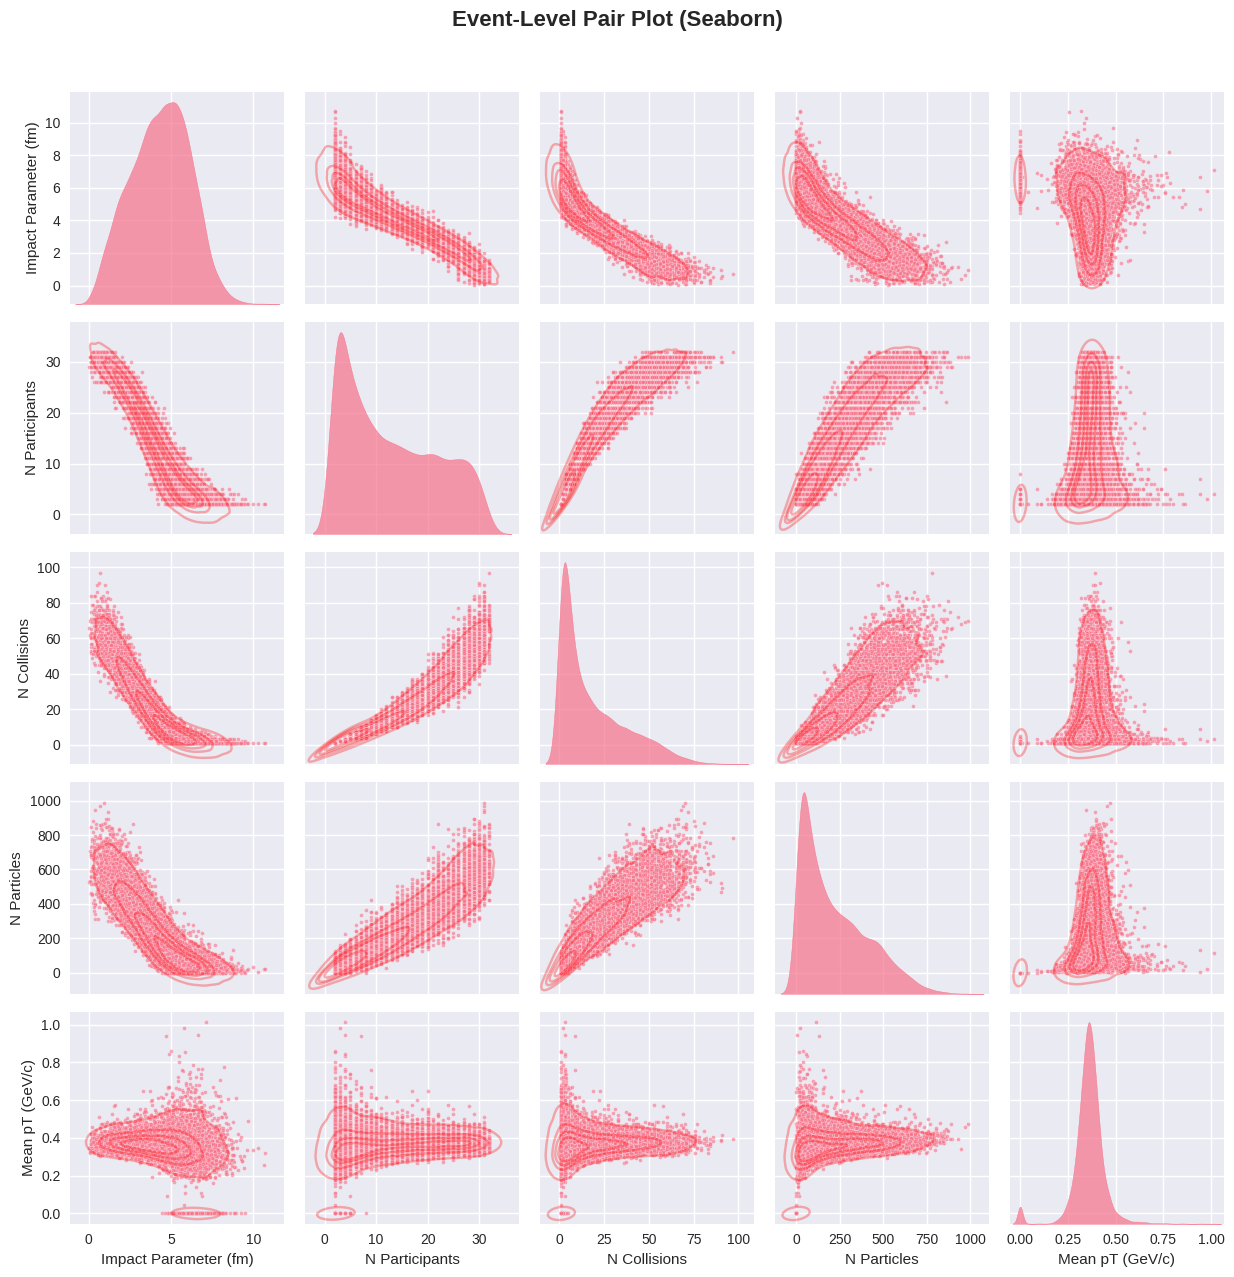

In [11]:
# Alternative: Using seaborn's pairplot with custom styling
plt.figure(figsize=(16, 14))

# Select relevant columns and create a subset for better visualization
event_subset = events_df[['impact_parameter', 'n_part', 'n_coll', 'n_particles', 'mean_pT']].copy()

# Rename columns for better display
event_subset.columns = ['Impact Parameter (fm)', 'N Participants', 'N Collisions', 'N Particles', 'Mean pT (GeV/c)']

# Create pairplot with KDE on diagonal
g = sns.pairplot(event_subset, 
                 diag_kind='kde',  # KDE for diagonal
                 plot_kws={'alpha': 0.6, 's': 8},  # For scatter plots
                 diag_kws={'fill': True, 'alpha': 0.7})  # For KDE plots

# Customize the plot
g.fig.suptitle('Event-Level Pair Plot (Seaborn)', fontsize=16, fontweight='bold', y=1.02)

# Add 2D density contours to off-diagonal plots
for i in range(len(event_subset.columns)):
    for j in range(len(event_subset.columns)):
        if i != j:
            ax = g.axes[i, j]
            # Add density contours
            sns.kdeplot(data=event_subset, 
                       x=event_subset.columns[j], 
                       y=event_subset.columns[i], 
                       ax=ax, 
                       levels=5, 
                       alpha=0.3, 
                       color='red')

plt.tight_layout()
plt.show()

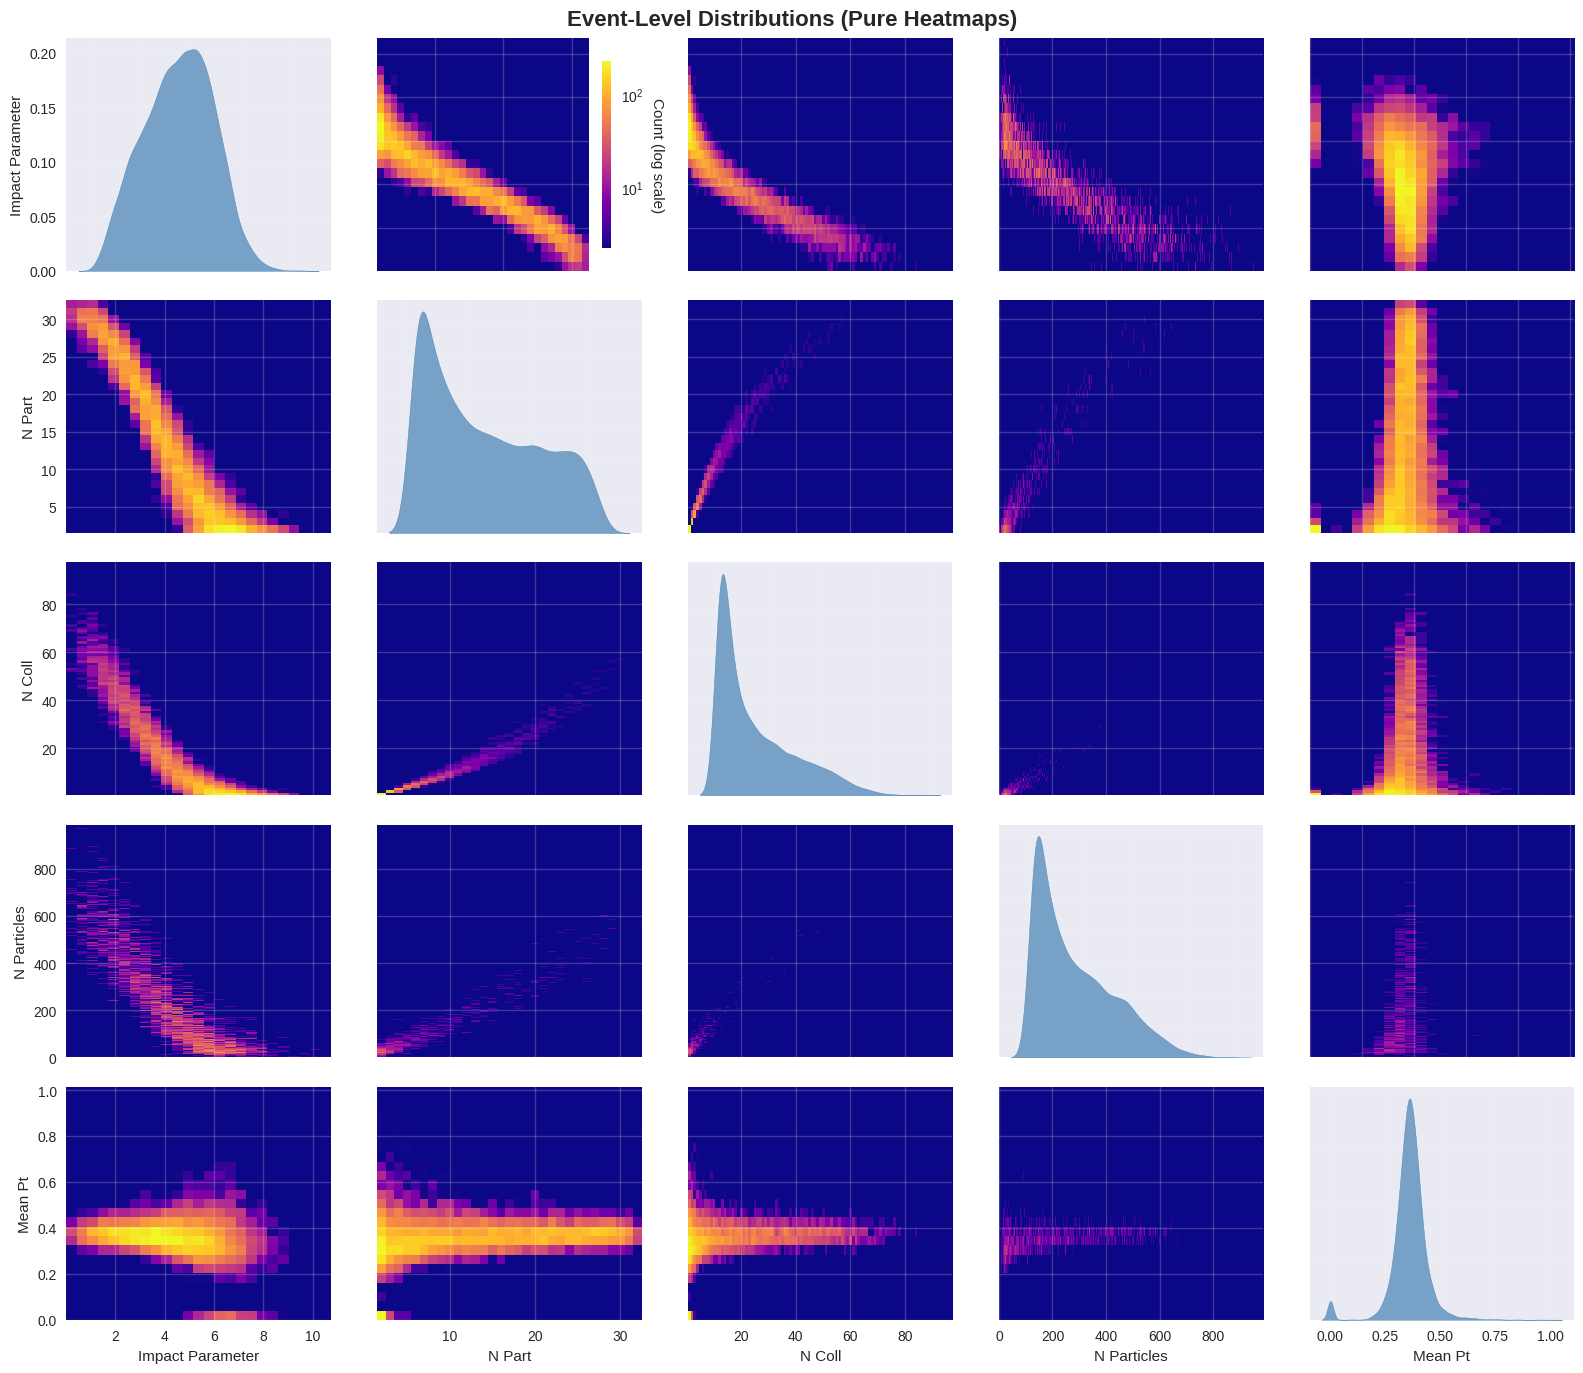

In [12]:
# Pure heatmap version for 2D distributions
def create_heatmap_pairplot(data, cols, figsize=(16, 14)):
    """Create a pair plot with heatmaps for 2D and KDE for 1D"""
    n_vars = len(cols)
    fig, axes = plt.subplots(n_vars, n_vars, figsize=figsize)
    fig.suptitle('Event-Level Distributions (Pure Heatmaps)', fontsize=16, fontweight='bold')
    
    for i in range(n_vars):
        for j in range(n_vars):
            ax = axes[i, j]
            
            if i == j:
                # Diagonal: KDE plot
                sns.kdeplot(data=data, x=cols[i], ax=ax, fill=True, alpha=0.7, color='steelblue')
                ax.set_ylabel('Density')
            else:
                # Off-diagonal: Pure heatmap
                x_data = data[cols[j]]
                y_data = data[cols[i]]
                
                # Remove NaN values
                mask = ~(np.isnan(x_data) | np.isnan(y_data))
                x_clean = x_data[mask]
                y_clean = y_data[mask]
                
                if len(x_clean) > 0 and len(y_clean) > 0:
                    # Determine appropriate binning for discrete vs continuous variables
                    discrete_vars = ['n_part', 'n_coll', 'n_particles']
                    
                    # Set bins for x-axis
                    if cols[j] in discrete_vars:
                        x_bins = np.arange(x_clean.min(), x_clean.max() + 2) - 0.5  # One bin per integer value
                    else:
                        x_bins = 25
                    
                    # Set bins for y-axis
                    if cols[i] in discrete_vars:
                        y_bins = np.arange(y_clean.min(), y_clean.max() + 2) - 0.5  # One bin per integer value
                    else:
                        y_bins = 25
                    
                    # Create 2D histogram for heatmap
                    hist, xedges, yedges = np.histogram2d(x_clean, y_clean, bins=[x_bins, y_bins])
                    
                    # Add small epsilon to avoid log(0) issues and tune min z for better contrast
                    hist_log = hist + 1e-10
                    
                    # Set a more reasonable minimum for better contrast (e.g., 1% of max value)
                    hist_max = hist_log.max()
                    hist_min = max(hist_log[hist_log > 0].min(), hist_max * 0.01)  # Use 1% of max as minimum
                    
                    # Create heatmap with logarithmic scale
                    from matplotlib.colors import LogNorm
                    im = ax.imshow(hist_log.T, origin='lower', aspect='auto', 
                                 extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                                 cmap='plasma', interpolation='nearest',  # Use 'nearest' for discrete data
                                 norm=LogNorm(vmin=hist_min, vmax=hist_max))
                    
                    # Add colorbar for selected plots to avoid clutter
                    if i == 0 and j == 1:
                        cbar = plt.colorbar(im, ax=ax, shrink=0.8)
                        cbar.set_label('Count (log scale)', rotation=270, labelpad=15)
            
            # Set labels
            if i == n_vars - 1:
                ax.set_xlabel(cols[j].replace('_', ' ').title())
            else:
                ax.set_xlabel('')
                
            if j == 0:
                ax.set_ylabel(cols[i].replace('_', ' ').title())
            else:
                ax.set_ylabel('')
                
            # Remove tick labels for inner plots
            if i < n_vars - 1:
                ax.set_xticklabels([])
            if j > 0:
                ax.set_yticklabels([])
                
            ax.grid(True, alpha=0.2)
    
    plt.tight_layout()
    return fig

# Create the heatmap pair plot
event_cols_main = ['impact_parameter', 'n_part', 'n_coll', 'n_particles', 'mean_pT']
fig = create_heatmap_pairplot(events_df, event_cols_main)
plt.show()